# Analysis of CLS and no-filter images

## Method

- Pick two stars: Polaris and a fainter one, defining the subimage where they sit. Pick a nearby sky region.
- Plot RGB debayered version of each subimage. There are 12 files with CLS filter, 7 without.
- Compute exposure normalization factor for each image.
- Multiply each image by normalization factor.
- Again, plot RGB debayered version of each normalized subimage. 
  - they should be directly comparable in terms of gray scale (pixel values).
- TBD

In [1]:
%pylab notebook
%matplotlib notebook

import os, glob

import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import exifread
import rawpy
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


## Utility functions

In [2]:
# Extracts exposure EXIF data from a list of images
def get_metadata(filelist):

    table = Table(names=('ISO', 'Time', 'f/stop', 'Exposure', 'File'), 
                  dtype=('f4','f4','f4','f4','S2'))
    
    exposure_dict = {}

    for filename in filelist:
        f = open(filename, 'rb')
        tags = exifread.process_file(f)
        iso = ''
        exptime = ''
        for tag in tags.keys():
            if tag in ['EXIF ExposureTime']:
                exptime = tags[tag]
            if tag in ['EXIF ISOSpeedRatings']:
                iso = tags[tag]

        index = filename.split('_')[-1].rfind('.')
        fstop = float(filename.split('_')[-1][:index][1:])
        iso = float(str(iso))
        exptime = float(str(exptime))
        
        exposure = exptime/3.2 / iso/100 / fstop/2.8 / 1.E-5
        
        table.add_row((iso, exptime, fstop, exposure, filename))
        
        exposure_dict[filename] = exposure

    return table, exposure_dict

In [3]:
# Plot mosaic with all images from a list
def view_summary(filelist, slicex, slicey, nrows=3, ncols=4):
    fig = plt.figure(figsize=[10, 6])
    for i, filename in enumerate(filelist):
        with rawpy.imread(filename) as raw:
            # These settings preserve the raw pixel values into the output 
            # RGB array. For this data set, they saturate.
            rgb = raw.postprocess(gamma=(1,1), 
                                  output_bps=16,
                                  use_camera_wb=False,
                                  use_auto_wb=False,
                                  no_auto_bright=True, 
                                  no_auto_scale=True,
                                  output_color=rawpy.ColorSpace.raw)
            a = fig.add_subplot(nrows, ncols, i+1)
            plt.imshow(rgb[slicey,slicex])

## Relevant paths for the exposures with and without filter

In [4]:
basepath = '../astrophotography_data/cls/'
without_filter_path = os.path.join(basepath,'without_filter')
with_filter_path = os.path.join(basepath,'with_filter')

list_files_without_filter = glob.glob(without_filter_path + '/*.ARW')
list_files_with_filter = glob.glob(with_filter_path + '/*.ARW')

## Isolate region of interest

This should be Polaris, but I am not 100% sure it is.

In [5]:
s1 = slice(1960,2060)
s2 = slice(2500,2600)

## With filter

<IPython.core.display.Javascript object>


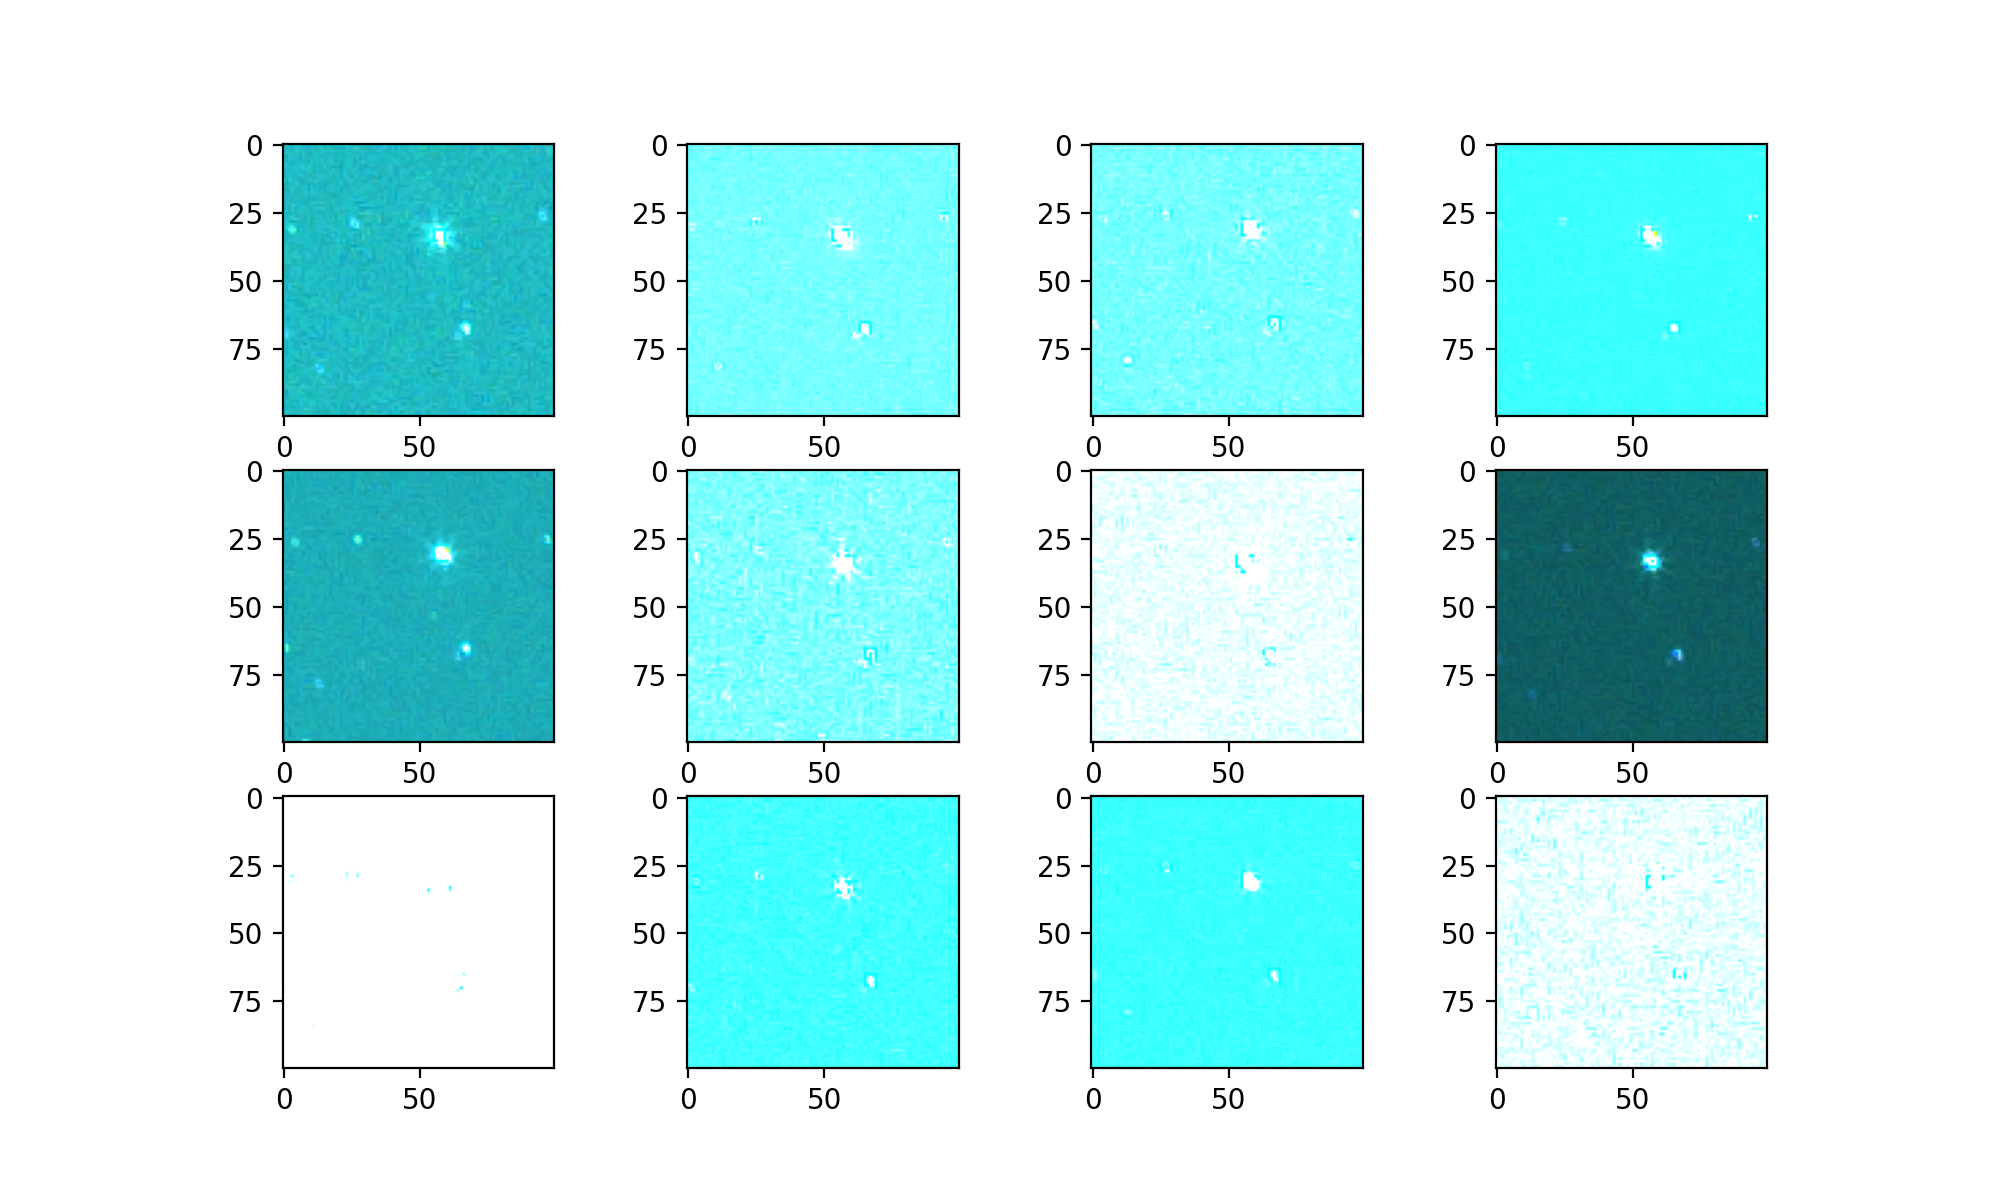

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [6]:
view_summary(list_files_with_filter, s2, s1)

## Without filter

<IPython.core.display.Javascript object>


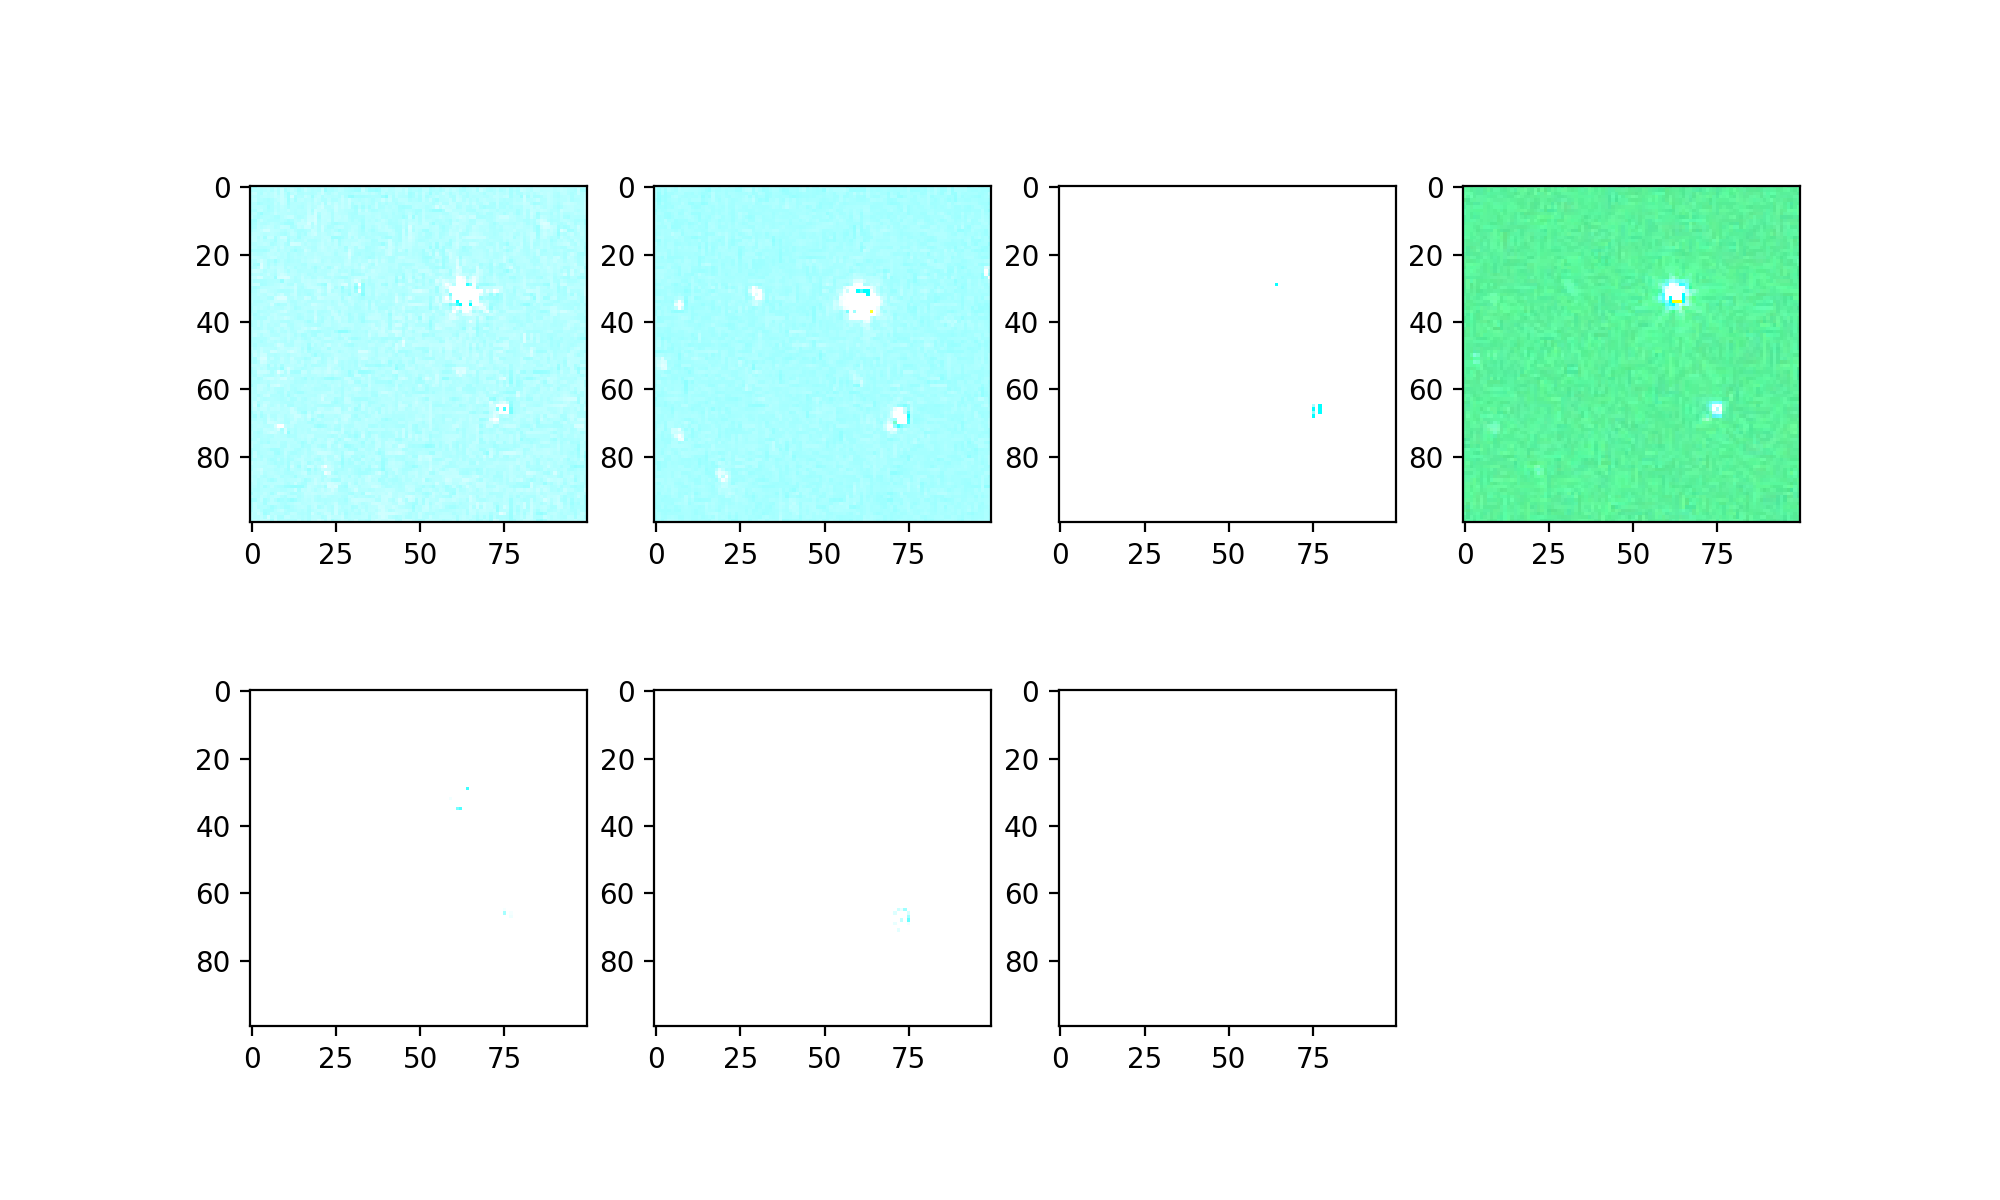

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [7]:
view_summary(list_files_without_filter, s2, s1, nrows=2)

## EXIF

In [8]:
t1, exp1 = get_metadata(list_files_with_filter)
t2, exp2 = get_metadata(list_files_without_filter)
t1.pprint_all()
t2.pprint_all()

 ISO   Time f/stop  Exposure                           File                         
------ ---- ------ --------- -------------------------------------------------------
 400.0 30.0    4.0  2.092634    ../astrophotography_data/cls/with_filter/I400_f4.ARW
 400.0 30.0    2.0  4.185268    ../astrophotography_data/cls/with_filter/I400_f2.ARW
 800.0 30.0    2.8 1.4947386  ../astrophotography_data/cls/with_filter/I800_f2.8.ARW
 200.0 30.0    2.0  8.370536    ../astrophotography_data/cls/with_filter/I200_f2.ARW
 200.0 30.0    2.8 5.9789543  ../astrophotography_data/cls/with_filter/I200_f2.8.ARW
1600.0 30.0    4.0 0.5231585   ../astrophotography_data/cls/with_filter/I1600_f4.ARW
 800.0 30.0    2.0  2.092634    ../astrophotography_data/cls/with_filter/I800_f2.ARW
 200.0 30.0    4.0  4.185268    ../astrophotography_data/cls/with_filter/I200_f4.ARW
1600.0 30.0    2.0  1.046317   ../astrophotography_data/cls/with_filter/I1600_f2.ARW
 800.0 30.0    4.0  1.046317    ../astrophotography_data/cls/with